### Import libraries ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Read from CSV 

In [3]:
df = pd.read_csv('wiki_most_played.csv')
df1 = pd.read_csv('youtubelive.csv')

### Create a new dataframe for analysis

In [4]:
data = df.merge(df1, on='Game',how='inner')
data

,Unnamed: 0_x,Game,million_played,Unnamed: 0_y,K_views
0,3,PlayerUnknown's Battlegrounds,555.0,14,10.0
1,8,Fortnite,250.0,4,25.0
2,14,League of Legends,111.0,8,20.0
3,15,World of Warcraft,100.0,48,1.1
4,18,MapleStory,100.0,20,6.0
5,23,Hearthstone,100.0,16,10.0
6,25,Minecraft,91.0,1,60.0
7,32,Grand Theft Auto V,71.0,12,12.0
8,36,Lineage,50.0,46,1.3
9,39,Apex Legends,50.0,13,11.0


In [5]:
played = pd.DataFrame(data['million_played'])
viewed = pd.DataFrame(data['K_views'])

In [11]:
data = pd.concat([played,viewed],axis=1)

### Plot it a bit 

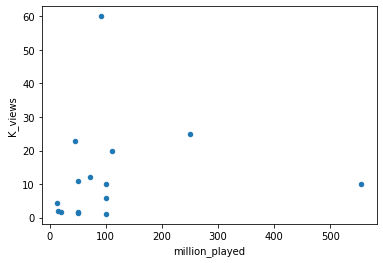

In [12]:
data.plot(kind='scatter',x ='million_played',y = 'K_views')

### Run a regression
#### Want to see if null hypothesis is reasonable: the more players a video games has, the more likely it is lively viewed  
     the regression is not an ideal one since:
     1, regressions should be run on at least 20 observations yet here we only have 15
     2, viewers on youtube games only represent a small portion of live video viewers
     3, with a high P-value, we can not prove the hypothesis is true 

In [8]:
model = sm.OLS(viewed, played)

In [9]:
fit = model.fit()

In [10]:
fit.summary()

C:\Users\Zoe Liu\Anaconda\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                K_views   R-squared (uncentered):                   0.230
Model:                            OLS   Adj. R-squared (uncentered):              0.175
Method:                 Least Squares   F-statistic:                              4.193
Date:                Thu, 16 Jan 2020   Prob (F-statistic):                      0.0598
Time:                        14:52:44   Log-Likelihood:                         -63.854
No. Observations:                  15   AIC:                                      129.7
Df Residuals:                      14   BIC:                                      130.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
million_played     0.0548      0.027      2.048      0.060      -0.003       0.112
==============================================================================
Omnibus:                       16.208   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.574
Skew:                           1.597   Prob(JB):                     0.000684
Kurtosis:                       6.622   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Load the data to SQL database

In [14]:
from sqlalchemy import create_engine
import os

In [15]:
pg_user = 'postgres'
pg_password = 'HEYgirl406'
db_name = 'game_db'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

In [18]:
engine.table_names()

[]

In [19]:
data.to_sql(name='Game_Data', con=engine, if_exists='append', index=True)